# Eat Safe, Love

## Notebook Set Up

In [2]:
# Import dependencies
from pymongo import MongoClient
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [4]:
# assign the uk_food database to a variable name
uk_food = mongo['uk_food']

In [5]:
# review the collections in our database
uk_food.list_collection_names()

['establishments']

In [6]:
# assign the collection to a variable
establishments = uk_food['establishments']

In [79]:
establishments.find_one()

{'_id': ObjectId('66b6e876b3e0b8e2bd967821'),
 'FHRSID': 289352,
 'ChangesByServerID': 0,
 'LocalAuthorityBusinessID': 'PI/000002460',
 'BusinessName': 'The Ship',
 'BusinessType': 'Pub/bar/nightclub',
 'BusinessTypeID': 7843,
 'AddressLine1': '23 The Stade',
 'AddressLine2': 'Folkestone',
 'AddressLine3': 'Kent',
 'AddressLine4': '',
 'PostCode': 'CT19 6AB',
 'Phone': '',
 'RatingValue': 5,
 'RatingKey': 'fhrs_5_en-gb',
 'RatingDate': '2015-08-27T00:00:00',
 'LocalAuthorityCode': '188',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'scores': {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5},
 'SchemeType': 'FHRS',
 'geocode': {'longitude': 1.188537, 'latitude': 51.08084},
 'RightToReply': '',
 'Distance': 4591.912144538092,
 'NewRatingPending': False,
 'meta': {'dataSource': None,
  'extractDate': '0001-01-01T00:00:00',
  'itemCount': 0,
  're

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [80]:
# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene" : 20}

# Use count_documents to display the number of documents in the result
results = list(establishments.find(query))
print("Total records with a hygiene score of 20 :",establishments.count_documents(query))
print("----------------------------------------------")

# Display the first document in the results using pprint
pprint(results[0:1])

Total records with a hygiene score of 20 : 41
----------------------------------------------
[{'AddressLine1': '5-6 Southfields Road',
  'AddressLine2': 'Eastbourne',
  'AddressLine3': 'East Sussex',
  'AddressLine4': '',
  'BusinessName': 'The Chase Rest Home',
  'BusinessType': 'Caring Premises',
  'BusinessTypeID': 5,
  'ChangesByServerID': 0,
  'Distance': 4613.888288172291,
  'FHRSID': 110681,
  'LocalAuthorityBusinessID': '4029',
  'LocalAuthorityCode': '102',
  'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
  'LocalAuthorityName': 'Eastbourne',
  'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'BN21 1BU',
  'RatingDate': '2021-09-23T00:00:00',
  'RatingKey': 'fhrs_0_en-gb',
  'RatingValue': 0,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('66b6e879b3e0b8e2bd96934f'),
  'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
  'links': [{'href': 'https://api.rating

In [81]:
# Convert the result to a Pandas DataFrame
hygiene_20_df =pd.DataFrame(results)

# Display the number of rows in the DataFrame
print(hygiene_20_df.shape)
print("Total number of rows in DataFrame",len(hygiene_20_df))

# Display the first 10 rows of the DataFrame
hygiene_20_df.head(10)

(41, 28)
Total number of rows in DataFrame 41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,66b6e879b3e0b8e2bd96934f,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,66b6e879b3e0b8e2bd9696d1,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,66b6e879b3e0b8e2bd9699da,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,66b6e879b3e0b8e2bd969bd9,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,66b6e879b3e0b8e2bd969be8,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,66b6e87ab3e0b8e2bd96a57b,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,66b6e87ab3e0b8e2bd96a79c,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,66b6e87bb3e0b8e2bd96bcc7,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,66b6e87cb3e0b8e2bd96c10b,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

In [49]:
print(f"Total {len(hygiene_20_df)} establishments have a hygiene score equal to 20")
print("Establishment names are:\n-------------------------------------")
est_names = hygiene_20_df.BusinessName.unique()
for name in est_names: print(name)

Total 41 establishments have a hygiene score equal to 20
Establishment names are:
-------------------------------------
The Chase Rest Home
Brenalwood
Melrose Hotel
Seaford Pizza
Golden Palace
Ashby's Butchers
South Sea Express Cuisine
The Tulip Tree
F & S
Longhouse
Westview Playgroup Based At Downsview Comm Primary
Whatever The Weather Coffee
Kings Restaurant (Oriental)
Xich Lo
Asian Supermarket Ltd: T/A Best Food Wine Ltd
Londis
Costcutter
La Simon Ltd
Caribiscus Ltd
Kennedy Fried Chicken
Gah Shing
A1 News & Wine
Cakes & Bakes
Sahajanand Catering Limited
Sisko Cafe
Magazin Romanesc Diana
Bali Maamalas
Angels Bakery
Nikkis Place Restaurant
Chicago 30
Samui Thai Restaurant
Pakhtoonkhwa Restaurant
New Happy Garden
Mummy Yum
Gospodina
Leo's Bar & Grill
Royal Ribs
Great Hallingbury Manor Hotel
The Dog And Duck
Oriental Cottage


### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [83]:
main_df.LocalAuthorityName.unique() #checking if London is a LocalAuthorityName 

array(['Folkestone and Hythe', 'Thanet', 'Canterbury City', 'Ashford',
       'Rother', 'East Suffolk', 'Hastings', 'Swale', 'Maidstone',
       'Dartford', 'Bexley', 'Gravesham', 'Sevenoaks', 'Wealden',
       'Tunbridge Wells', 'Eastbourne', 'North Norfolk', 'Tendring',
       'Lewes', 'Babergh', 'Tonbridge and Malling', 'Medway', 'Rochford',
       'Southend-On-Sea', 'Hackney', 'Slough', 'Basildon', 'York',
       'Maldon', 'Colchester', 'Orkney Islands', 'Ipswich', 'Salford',
       'Pendle', 'City of London Corporation', 'Castle Point', 'Knowsley',
       'West Suffolk', 'Arun', 'Braintree', 'Thurrock', 'Chelmsford',
       'Aberdeenshire', 'Stratford-on-Avon', 'Mid Sussex', 'Tandridge',
       'Bromley', 'Brentwood', 'Havering', 'East Renfrewshire',
       'Tower Hamlets', 'Greenwich', 'Barking and Dagenham', 'Lewisham',
       'Lambeth', 'Uttlesford', 'Kensington and Chelsea', 'Epping Forest',
       'Rushmoor', 'Sunderland', 'Newham', 'Spelthorne', 'Redbridge',
       'Reading'

In [85]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
lon_query = {'LocalAuthorityName':{"$regex":"London"},
             "RatingValue":{"$gte":4}}

#lon_query = {'LocalAuthorityName': "City of London Corporation","RatingValue":{"$gte":4}}

# Use count_documents to display the number of documents in the result
london_est_rating_gte4 = list(establishments.find(lon_query))

print("Total number of establishments in London with a RatingValue >= 4 :",establishments.count_documents(lon_query))
print("----------------------------------------------")

# Display the first document in the results using pprint
pprint(london_est_rating_gte4[0:1])

Total number of establishments in London with a RatingValue >= 4 : 33
----------------------------------------------
[{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
  'AddressLine2': 'Sheppy Kent',
  'AddressLine3': '',
  'AddressLine4': '',
  'BusinessName': "Charlie's",
  'BusinessType': 'Other catering premises',
  'BusinessTypeID': 7841,
  'ChangesByServerID': 0,
  'Distance': 4627.439467780196,
  'FHRSID': 621707,
  'LocalAuthorityBusinessID': 'PI/000025307',
  'LocalAuthorityCode': '508',
  'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
  'LocalAuthorityName': 'City of London Corporation',
  'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'ME12',
  'RatingDate': '2021-10-18T00:00:00',
  'RatingKey': 'fhrs_4_en-gb',
  'RatingValue': 4,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('66b6e87bb3e0b8e2bd96ad6f'),
  'geocode': {'latitude

In [86]:
# Convert the result to a Pandas DataFrame
london_df =pd.DataFrame(london_est_rating_gte4)

# Display the number of rows in the DataFrame
print(london_df.shape)
print("Total number of establishments with  Local Authority as 'City of London Corporation': ",len(london_df))

# Display the first 10 rows of the DataFrame
london_df.head(10)

(33, 28)
Total number of establishments with  Local Authority as 'City of London Corporation':  33


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,66b6e87bb3e0b8e2bd96ad6f,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,66b6e87bb3e0b8e2bd96b095,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,66b6e87bb3e0b8e2bd96bbe2,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,66b6e87cb3e0b8e2bd96c9e1,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,66b6e87cb3e0b8e2bd96c9e3,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,66b6e87cb3e0b8e2bd96d0e8,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,66b6e87eb3e0b8e2bd96f1f6,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,66b6e87eb3e0b8e2bd96f5bd,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,66b6e87e

In [87]:
print(f"Total {len(london_df)} establishments in London have a RatingValue greater than or equal to 4")
print("Establishment names are:\n-------------------------------------")
est_names = london_df.BusinessName.unique()
for name in est_names: print(name)

Total 33 establishments in London have a RatingValue greater than or equal to 4
Establishment names are:
-------------------------------------
Charlie's
Mv City Cruises Erasmus
Benfleet Motor Yacht Club
Coombs Catering t/a The Lock and Key
Tilbury Seafarers Centre
Mv Valulla
Tereza Joanne
Brick Lane Brews
The Nuance Group (UK) Limited
WH Smith
City Bar & Grill
Caffè Nero
Jet Centre
Mv Sunborn Yacht Hotel
Good Hotel London
La Nonna lina
Wake Up Docklands Limited
MV Venus Clipper
MV Typhoon clipper
MV Moon clipper
MV Jupiter clipper
MV Monsoon clipper
MV Meteor clipper
MV Mercury clipper
MV Tornado clipper
MV Cyclone clipper
MV Hurricane clipper
MV Neptune clipper
MV Galaxy clipper
MV Sun clipper
Mv Storm Clipper
Canary Wharf 1V
MV Aurora clipper


### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [88]:
#Gettings the latitude and longiture of "Penang Flavours"
pprint(establishments.find_one({"BusinessName":"Penang Flavours"},{"BusinessName":1,"geocode":1}))

{'BusinessName': 'Penang Flavours',
 '_id': ObjectId('66b6e8b32c87bdd9d217a5c2'),
 'geocode': {'latitude': 51.490142, 'longitude': 0.08384}}


In [89]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.490142
longitude = 0.08384

penang_query = {"RatingValue": 5,
                "geocode.latitude": {"$gte": latitude - degree_search, "$lte": latitude + degree_search},
                "geocode.longitude": {"$gte": longitude - degree_search, "$lte": longitude + degree_search}         
              }

sort = [("scores.Hygiene",1)]
limit = 5

penang_result = list(establishments.find(penang_query).sort(sort).limit(limit))
 
# Print the results
print(f"Total establishments closer to 'Penang Flavours' are :", len(penang_result))
print("---------------------------------------------------------------")
pprint(penang_result[0:5])

Total establishments closer to 'Penang Flavours' are : 5
---------------------------------------------------------------
[{'AddressLine1': '130 - 132 Plumstead High Street',
  'AddressLine2': '',
  'AddressLine3': 'Plumstead',
  'AddressLine4': 'Greenwich',
  'BusinessName': 'Volunteer',
  'BusinessType': 'Pub/bar/nightclub',
  'BusinessTypeID': 7843,
  'ChangesByServerID': 0,
  'Distance': 4646.965634598608,
  'FHRSID': 694609,
  'LocalAuthorityBusinessID': 'PI/000116619',
  'LocalAuthorityCode': '511',
  'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
  'LocalAuthorityName': 'Greenwich',
  'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'SE18 1JQ',
  'RatingDate': '2019-08-05T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': 5,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('66b6e87db3e0b8e2bd96ebb1'),
  'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
  'links': [

In [91]:
# Convert result to Pandas DataFrame
penang_df = pd.DataFrame(penang_result)

print(f"Top 5 establishments with a RatingValue of 5, sorted by lowest hygiene score, nearest to Penang Flavours are")
print("-------------------------------------")

restaurant_names = penang_df.head().BusinessName.unique()
for name in restaurant_names: print(name)

print("-------------------------------------")
penang_df.head()

Top 5 establishments with a RatingValue of 5, sorted by lowest hygiene score, nearest to Penang Flavours are
-------------------------------------
Volunteer
Plumstead Manor Nursery
Atlantic Fish Bar
Iceland
Howe and Co Fish and Chips - Van 17
-------------------------------------


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,66b6e87db3e0b8e2bd96ebb1,694609,0,PI/000116619,Volunteer,Pub/bar/nightclub,7843,130 - 132 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.09208, 'latitude': 51.4873437}",,4646.965635,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,66b6e87db3e0b8e2bd96ebca,695241,0,PI/000179088,Plumstead Manor Nursery,Caring Premises,5,Plumstead Manor School Old Mill Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0859939977526665, 'latitude': ...",,4646.974010,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,66b6e87db3e0b8e2bd96ebcd,694478,0,PI/000086506,Atlantic Fish Bar,Takeaway/sandwich shop,7844,35 Lakedale Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0912164, 'latitude': 51.4867296}",,4646.974612,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,66b6e87db3e0b8e2bd96eb86,695223,0,PI/000178842,Iceland,Retailers - supermarkets/hypermarkets,7840,144 - 146 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0924199968576431, 'latitude': ...",,4646.946071,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,66b6e87db3e0b8e2bd96eb95,1380578,0,14425,Howe and Co Fish and Chips - Van 17,Mobile caterer,7846,Restaurant And Premises 107A Plumstead High St...,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0925370007753372, 'latitude': ...",,4646.955931,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

Note :The scores for Hygiene, Structural, and ConfidenceInManagement work in reverse. This means, the higher the value, the worse the establishment is in these areas.

In [92]:
# Create a pipeline that:
# 1. Matches establishments with a hygiene score of 0
# 2. Groups the matches by Local Authority
# 3. Sorts the matches from highest to lowest
match = {"$match":{"scores.Hygiene":0}}
group = {"$group":{"_id":"$LocalAuthorityName", "count":{"$sum":1}}}
sortBy = {"$sort":{"count":-1}}

pipe= [match,group,sortBy]
lowest_hygiene_results = list(establishments.aggregate(pipe))

# Print the number of documents in the result
print("Total number of establishments in each Local Authority area with hygiene score of 0 : ",len(lowest_hygiene_results))
print("-------------------------------------------------------------------------------------------")

# Print the first 10 results
pprint(lowest_hygiene_results[0:10])

Total number of establishments in each Local Authority area with hygiene score of 0 :  55
-------------------------------------------------------------------------------------------
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [93]:
# Convert the result to a Pandas DataFrame
lowest_hygiene_df = pd.json_normalize(lowest_hygiene_results)

# Display the number of rows in the DataFrame
len(lowest_hygiene_df)

# Display the first 10 rows of the DataFrame
lowest_hygiene_df.head(10)

,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


### Additional Analysis based on score (Bonus to Learn)
Example Analysis Questions and Corresponding Plots:

1. What is the distribution of RatingValue across different BusinessType?
Plot: Bar plot of average RatingValue by BusinessType.

2. How does the Hygiene score vary across different BusinessType?
Plot: Box plot of Hygiene scores by BusinessType.

3. What is the relationship between RatingValue and Hygiene, Structural, and ConfidenceInManagement?
Plot: Scatter plots for RatingValue vs. Hygiene, RatingValue vs. Structural, and RatingValue vs. ConfidenceInManagement.

4. What are the top BusinessType categories with the highest average RatingValue?
Plot: Bar plot of the top BusinessType categories by average RatingValue.

5. What is the distribution of RatingValue across different LocalAuthorityName?
Plot: Bar plot or heatmap of RatingValue by LocalAuthorityName.

In [105]:
#Getting a copy of main_df for additional analysis to keep original data safe
copy_main_df = main_df.copy()

# Normalize the 'scores' column into separate columns
score_df = pd.json_normalize(copy_main_df['scores'])

# Concatenate the new columns with the original DataFrame
copy_main_df = pd.concat([copy_main_df, score_df], axis=1)

# Display the updated DataFrame
copy_main_df.columns

Index(['_id', 'FHRSID', 'ChangesByServerID', 'LocalAuthorityBusinessID',
       'BusinessName', 'BusinessType', 'BusinessTypeID', 'AddressLine1',
       'AddressLine2', 'AddressLine3', 'AddressLine4', 'PostCode', 'Phone',
       'RatingValue', 'RatingKey', 'RatingDate', 'LocalAuthorityCode',
       'LocalAuthorityName', 'LocalAuthorityWebSite',
       'LocalAuthorityEmailAddress', 'scores', 'SchemeType', 'geocode',
       'RightToReply', 'Distance', 'NewRatingPending', 'meta', 'links',
       'Hygiene', 'Structural', 'ConfidenceInManagement'],
      dtype='object')

In [106]:
#keeping only required columns
copy_main_df = copy_main_df[[ 'BusinessName', 'BusinessType', 'RatingValue', 'RatingKey', 'LocalAuthorityName',
                             'Hygiene', 'Structural', 'ConfidenceInManagement']]
copy_main_df.head(3)

,BusinessName,BusinessType,RatingValue,RatingKey,LocalAuthorityName,Hygiene,Structural,ConfidenceInManagement
0,The Ship,Pub/bar/nightclub,5,fhrs_5_en-gb,Folkestone and Hythe,5,5,5
1,Mariner,Pub/bar/nightclub,5,fhrs_5_en-gb,Folkestone and Hythe,0,5,0
2,The Pavilion,Restaurant/Cafe/Canteen,5,fhrs_5_en-gb,Folkestone and Hythe,5,5,5


In [112]:
print("Hygiene Values :",copy_main_df.Hygiene.unique())
print("Structural Values :",copy_main_df.Structural.unique())
print("ConfidenceInManagement Values :",copy_main_df.ConfidenceInManagement.unique())

Hygiene Values : [5 0 None 10 15 20 25 '']
Structural Values : [5 0 10 None 15 20 25 '']
ConfidenceInManagement Values : [5 0 10 None 20 30 '']


In [114]:
copy_main_df.dtypes

BusinessName              object
BusinessType              object
RatingValue                int64
RatingKey                 object
LocalAuthorityName        object
Hygiene                   object
Structural                object
ConfidenceInManagement    object
dtype: object

In [115]:
# Convert columns to numeric, forcing errors to NaN (this will convert '' to NaN)
copy_main_df['Hygiene'] = pd.to_numeric(copy_main_df['Hygiene'], errors='coerce')
copy_main_df['Structural'] = pd.to_numeric(copy_main_df['Structural'], errors='coerce')
copy_main_df['ConfidenceInManagement'] = pd.to_numeric(copy_main_df['ConfidenceInManagement'], errors='coerce')

# Replace None/NaN values with the mean of the column
copy_main_df['Hygiene'].fillna(copy_main_df['Hygiene'].mean(), inplace=True)
copy_main_df['Structural'].fillna(copy_main_df['Structural'].mean(), inplace=True)
copy_main_df['ConfidenceInManagement'].fillna(copy_main_df['ConfidenceInManagement'].mean(), inplace=True)

copy_main_df.dtypes

C:\Users\Kothari\AppData\Local\Temp\ipykernel_10452\3027477282.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copy_main_df['Hygiene'].fillna(copy_main_df['Hygiene'].mean(), inplace=True)
C:\Users\Kothari\AppData\Local\Temp\ipykernel_10452\3027477282.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

BusinessName               object
BusinessType               object
RatingValue                 int64
RatingKey                  object
LocalAuthorityName         object
Hygiene                   float64
Structural                float64
ConfidenceInManagement    float64
dtype: object

##### 1. What is the distribution of RatingValue across different BusinessType?

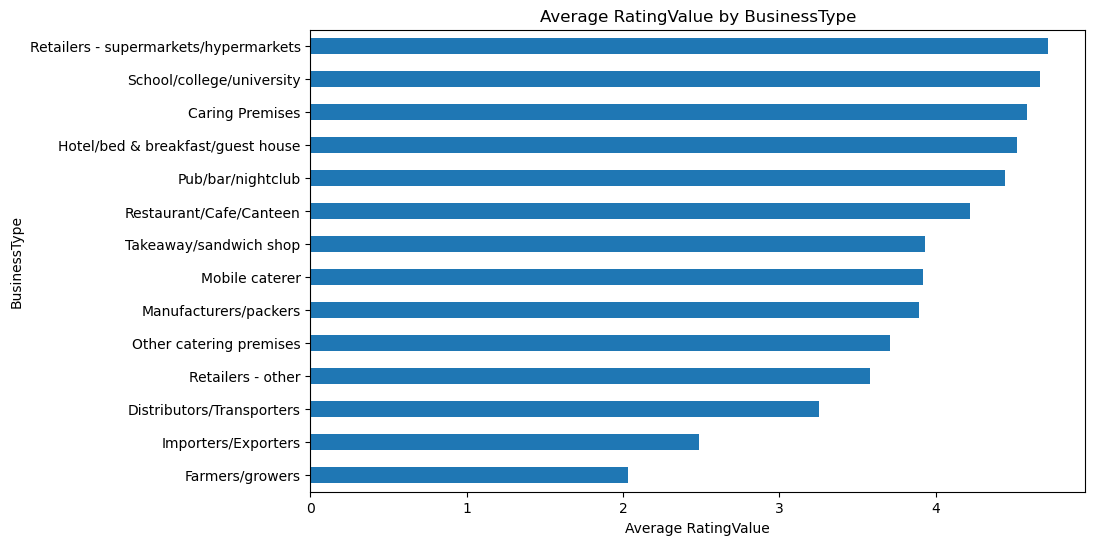

In [151]:
# Group by BusinessType and calculate the mean RatingValue
business_type_rating = copy_main_df.groupby('BusinessType')['RatingValue'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
business_type_rating.plot(kind='barh')
plt.title('Average RatingValue by BusinessType')
plt.xlabel('Average RatingValue')
plt.ylabel('BusinessType')
plt.savefig("charts/Bysiness_type_rating.png")
plt.show()

##### Average RatingValue by BusinessType:
The bar chart indicates that "Retailers - supermarkets/hypermarkets" and "School/college/university" have the highest average rating values. On the other hand, "Farmers/growers" have the lowest average rating values, which could suggest a disparity in the quality or standards upheld by different types of businesses.

#### 2. Hygiene Score Distribution Across Different BusinessType

The scores for Hygiene, Structural, and ConfidenceInManagement work in reverse. This means, the higher the value, the worse the establishment is in these areas.

<Figure size 1200x800 with 0 Axes>

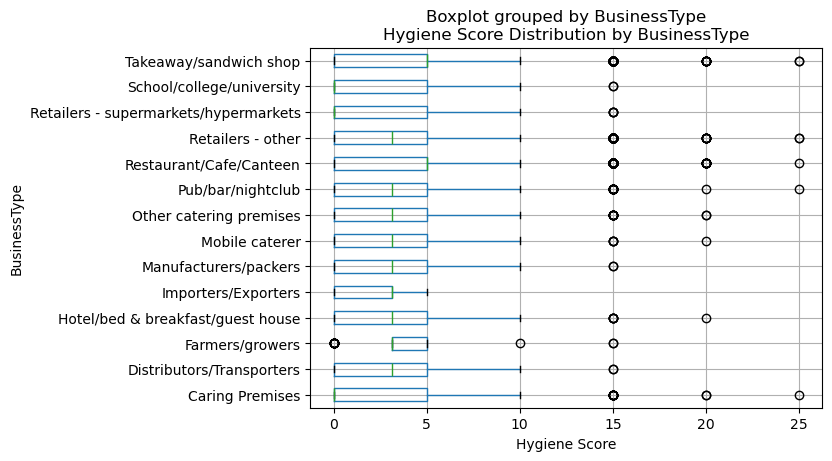

In [153]:
# Plotting a boxplot for Hygiene by BusinessType
plt.figure(figsize=(12, 8))
copy_main_df.boxplot(column='Hygiene', by='BusinessType', vert=False)
plt.title('Hygiene Score Distribution by BusinessType')
plt.xlabel('Hygiene Score')
plt.ylabel('BusinessType')
plt.savefig("charts/Hygiene_score_by_Business_type.png")
plt.show()

##### Hygiene Score Distribution: 
The boxplot shows that the "Farmers/Growers" category has a higher variability in hygiene scores with a significant number of outliers at the upper end, while most business types, such as "Caring Premises" and "Distributors/Transporters," generally cluster at lower scores with fewer outliers. This suggests that certain business types maintain more consistent hygiene standards compared to others.

In [163]:
import numpy as np
from scipy.stats import zscore, ttest_ind, chi2_contingency, pearsonr

# Assuming copy_main_df is your DataFrame

# Calculate Z-scores for the 'Hygiene' column
copy_main_df['Hygiene_zscore'] = zscore(copy_main_df['Hygiene'].fillna(copy_main_df['Hygiene'].mean()))

# Perform a t-test between two groups: Retailers and Restaurants
retailers = copy_main_df[copy_main_df['BusinessType'] == 'Retailers - supermarkets/hypermarkets']['Hygiene'].dropna()
restaurants = copy_main_df[copy_main_df['BusinessType'] == 'Restaurant/Cafe/Canteen']['Hygiene'].dropna()
t_stat, p_val = ttest_ind(retailers, restaurants, equal_var=False)

print(f"T-test statistic: {t_stat}, p-value: {p_val}")

# Chi-squared test: Create a contingency table of BusinessType and RatingValue
contingency_table = pd.crosstab(copy_main_df['BusinessType'], copy_main_df['RatingValue'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-squared test statistic: {chi2}, p-value: {p}")

# Pearson correlation between Hygiene and Structural scores
hygiene = copy_main_df['Hygiene'].fillna(copy_main_df['Hygiene'].mean())
structural = copy_main_df['Structural'].fillna(copy_main_df['Structural'].mean())
corr, p_value_corr = pearsonr(hygiene, structural)

print(f"Pearson correlation: {corr}, p-value: {p_value_corr}")

T-test statistic: -17.294947653201213, p-value: 3.1336347748077156e-61
Chi-squared test statistic: 4157.008595371766, p-value: 0.0
Pearson correlation: 0.559898002696332, p-value: 0.0


In [1]:
type_grouped = copy_main_df.groupby('BusinessType').mean()[['Hygiene', 'Structural', 'ConfidenceInManagement']]

# Plotting
plt.figure(figsize=(10, 7))

# Plot each score as a line on the same graph
plt.plot(copy_main_df.index, copy_main_df['Hygiene'], label='Hygiene Score', marker='o')
plt.plot(copy_main_df.index, copy_main_df['Structural'], label='Structural Score', marker='o')
plt.plot(copy_main_df.index, copy_main_df['ConfidenceInManagement'], label='Confidence In Management Score', marker='o')

# Formatting the plot
plt.xlabel('BusinessType')
plt.ylabel('Average Score')
plt.title('Average Scores by Business Type')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.legend()  # Show the legend
plt.grid(True)

# Display the plot
plt.show()

NameError: name 'copy_main_df' is not defined

In [148]:
copy_main_df.sort_values(by=['Hygiene'],ascending=False).head(10)

,BusinessName,BusinessType,RatingValue,RatingKey,LocalAuthorityName,Hygiene,Structural,ConfidenceInManagement
36020,Chicks,Takeaway/sandwich shop,0,fhrs_0_en-gb,Waltham Forest,25.0,25.0,30.0
36001,The Plough & Harrow,Pub/bar/nightclub,0,fhrs_0_en-gb,Waltham Forest,25.0,25.0,30.0
35565,Stratford News And Wines,Retailers - other,0,fhrs_0_en-gb,Newham,25.0,15.0,30.0
36522,Busy Bees at Leytonstone,Caring Premises,0,fhrs_0_en-gb,Waltham Forest,25.0,25.0,30.0
32948,Inferno,Takeaway/sandwich shop,0,fhrs_0_en-gb,Uttlesford,25.0,20.0,20.0
36101,The Continental Food Exchange/TFC Leytonstone,Retailers - other,0,fhrs_0_en-gb,Waltham Forest,25.0,25.0,30.0
36140,O42,Restaurant/Cafe/Canteen,0,fhrs_0_en-gb,Waltham Forest,25.0,25.0,30.0
29079,Costcutter,Retailers - other,0,fhrs_0_en-gb,Greenwich,20.0,15.0,20.0
28477,Londis,Retailers - other,0,fhrs_0_en-gb,Bromley,20.0,10.0,30.0
36203,Leo's Bar & Grill,Restaurant/Cafe/Canteen,1,fhrs_1_en-gb,Waltham Forest,20.0,5.0,20.0


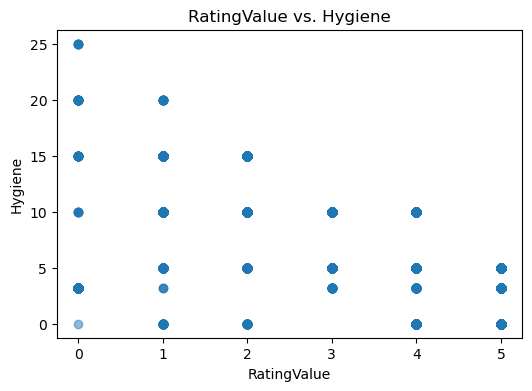

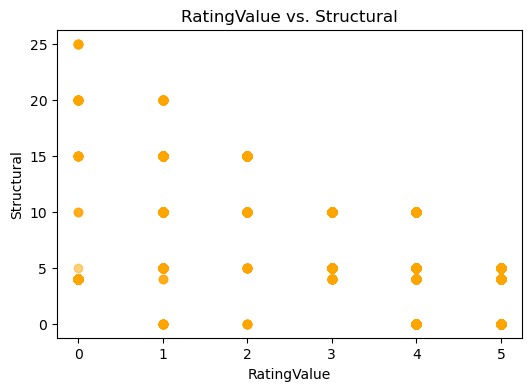

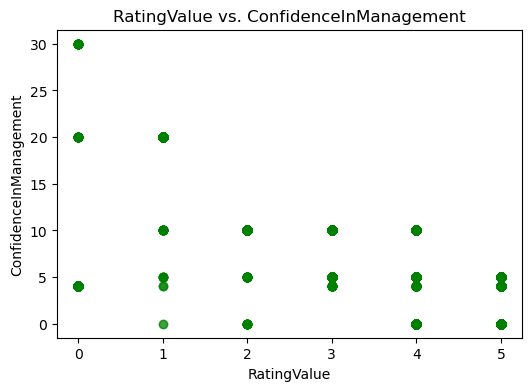

In [123]:
# Plotting RatingValue vs. Hygiene
plt.figure(figsize=(6, 4))
plt.scatter(copy_main_df['RatingValue'], copy_main_df['Hygiene'], alpha=0.5)
plt.title('RatingValue vs. Hygiene')
plt.xlabel('RatingValue')
plt.ylabel('Hygiene')
plt.show()

# Plotting RatingValue vs. Structural
plt.figure(figsize=(6, 4))
plt.scatter(copy_main_df['RatingValue'], copy_main_df['Structural'], alpha=0.5, color='orange')
plt.title('RatingValue vs. Structural')
plt.xlabel('RatingValue')
plt.ylabel('Structural')
plt.show()

# Plotting RatingValue vs. ConfidenceInManagement
plt.figure(figsize=(6, 4))
plt.scatter(copy_main_df['RatingValue'], copy_main_df['ConfidenceInManagement'], alpha=0.5, color='green')
plt.title('RatingValue vs. ConfidenceInManagement')
plt.xlabel('RatingValue')
plt.ylabel('ConfidenceInManagement')
plt.show()

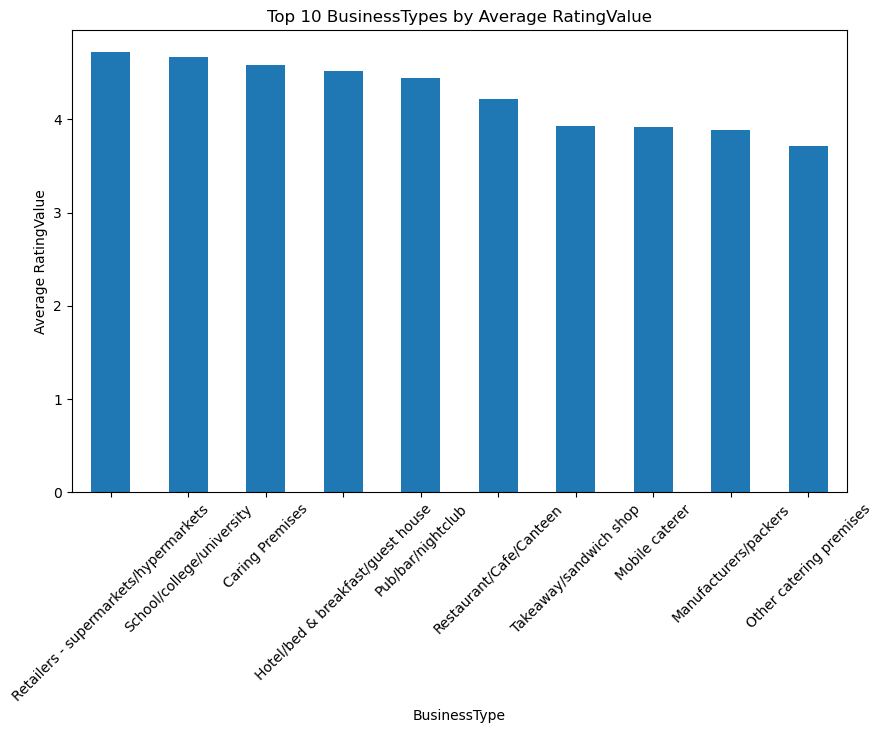

In [124]:
# Group by BusinessType and calculate the mean RatingValue
top_business_types = copy_main_df.groupby('BusinessType')['RatingValue'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_business_types.plot(kind='bar')
plt.title('Top 10 BusinessTypes by Average RatingValue')
plt.xlabel('BusinessType')
plt.ylabel('Average RatingValue')
plt.xticks(rotation=45)
plt.show()

In [127]:
copy_main_df.columns

Index(['BusinessName', 'BusinessType', 'RatingValue', 'RatingKey',
       'LocalAuthorityName', 'Hygiene', 'Structural',
       'ConfidenceInManagement'],
      dtype='object')

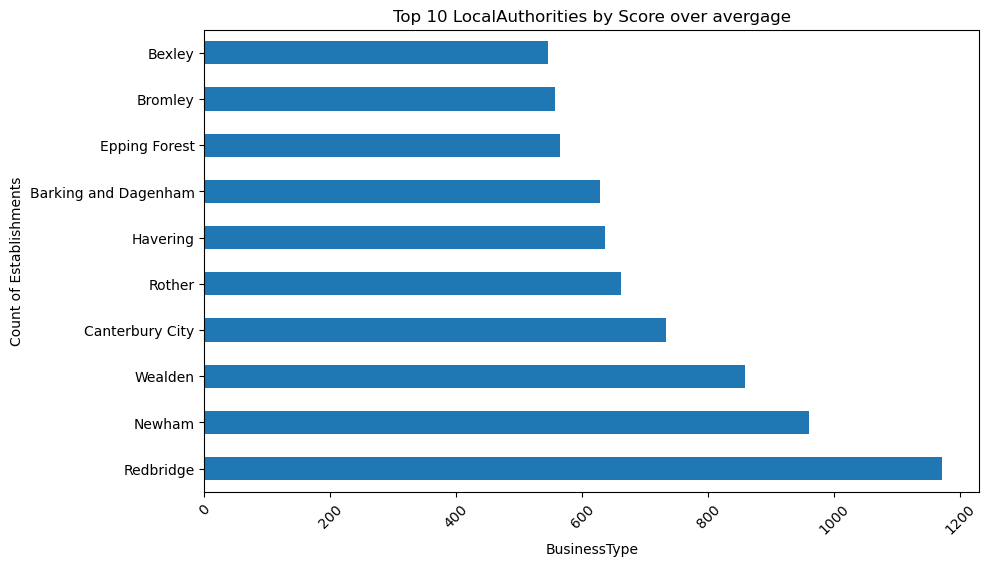

In [144]:
# Apply the filter conditions
filtered_df = copy_main_df.loc[
    (copy_main_df['Hygiene'] > copy_main_df['Hygiene'].mean()) &
    (copy_main_df['Structural'] > copy_main_df['Structural'].mean()) &
    (copy_main_df['ConfidenceInManagement'] > copy_main_df['ConfidenceInManagement'].mean())
]

# Get the value counts for 'LocalAuthorityName'
top_local_authorities = filtered_df['LocalAuthorityName'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(10, 6))
top_local_authorities.plot(kind='barh')
plt.title('Top 10 LocalAuthorities by Score over avergage')
plt.xlabel('BusinessType')
plt.ylabel('Count of Establishments')
plt.xticks(rotation=45)
plt.show()


In [143]:
local_authority_counts

LocalAuthorityName
Redbridge               1172
Newham                   960
Wealden                  859
Canterbury City          733
Rother                   662
Havering                 637
Barking and Dagenham     628
Epping Forest            565
Bromley                  557
Bexley                   545
Name: count, dtype: int64

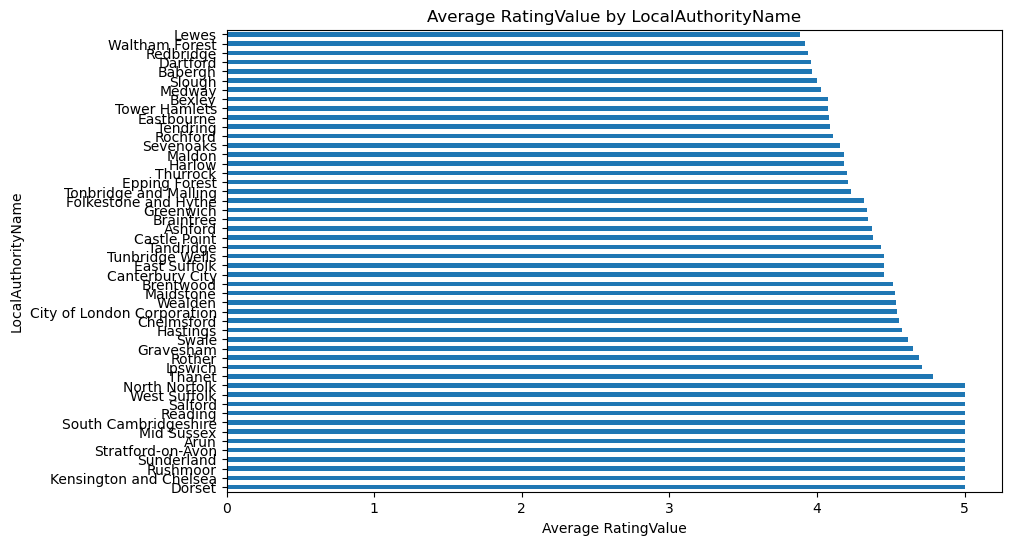

In [146]:
# Group by LocalAuthorityName and calculate the mean RatingValue
local_authority_rating = copy_main_df.groupby('LocalAuthorityName')['RatingValue'].mean().sort_values().nlargest(50)

# Plotting
plt.figure(figsize=(10, 6))
local_authority_rating.plot(kind='barh')
plt.title('Average RatingValue by LocalAuthorityName')
plt.xlabel('Average RatingValue')
plt.ylabel('LocalAuthorityName')
plt.show()